# Lab Exercise 2: Fourier Transform and Frequency Spectrum Analysis of Signals

**Name:** Ashwin Rajan  
**Reg No:** 2448509  
**Course/Lab:** Lab 2

**Aim:** Study DTFT (approximated) and DFT of sinusoidal, composite, exponential-decay, and rectangular signals, and compare time vs frequency characteristics.

**Global Settings:** Sampling Rate = 1000 Hz, Duration = 5 s


In [1]:
# Imports & Globals
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime

# Global parameters
SAMPLING_RATE = 1000  # Hz
DURATION = 5.0        # seconds
N_SAMPLES = int(SAMPLING_RATE * DURATION)
t = np.linspace(0, DURATION, N_SAMPLES, endpoint=False)

# Default spectrum ranges for plotting
FREQ_XLIM = (-100, 100)  # Hz (zoom window)
N_DTFT = 16384           # high-res zero-padded FFT for DTFT approx

# Keep track of figures for the PDF export
FIGS = []

def _keep_fig(fig):
    FIGS.append(fig)
    return fig


In [2]:
def compute_dtft(x, fs, nfft=N_DTFT, shift=True):
    """DTFT approximation: zero-padded FFT with large nfft for dense frequency grid."""
    X = np.fft.fft(x, n=nfft)
    f = np.fft.fftfreq(nfft, d=1/fs)
    if shift:
        X = np.fft.fftshift(X)
        f = np.fft.fftshift(f)
    # Normalize by length of original sequence to make amplitudes interpretable
    X = X / len(x)
    return f, X

def compute_dft(x, fs, n_dft=None, shift=True, normalize=True):
    """DFT (discrete spectrum)."""
    if n_dft is None:
        n_dft = len(x)
    X = np.fft.fft(x, n=n_dft)
    f = np.fft.fftfreq(n_dft, d=1/fs)
    if shift:
        X = np.fft.fftshift(X)
        f = np.fft.fftshift(f)
    if normalize:
        X = X / len(x)
    return f, X

def plot_time(t, x, title, xlim=(0, None)):
    fig, ax = plt.subplots(figsize=(12, 3.5))
    ax.plot(t, x)
    ax.set_title(f"{title}: Time-Domain")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    if xlim[1] is None:
        ax.set_xlim(xlim[0], t[-1])
    else:
        ax.set_xlim(*xlim)
    ax.grid(True)
    fig.tight_layout()
    return _keep_fig(fig)

def plot_dtft(t, x, fs, title, nfft=N_DTFT, freq_xlim=FREQ_XLIM):
    f, X = compute_dtft(x, fs, nfft=nfft, shift=True)
    fig, ax = plt.subplots(figsize=(12, 3.5))
    ax.plot(f, np.abs(X))
    ax.set_title(f"{title}: Continuous Frequency Spectrum (DTFT Approx.)")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude (|X(f)|)")
    ax.set_xlim(*freq_xlim)
    ax.grid(True)
    fig.tight_layout()
    return _keep_fig(fig)

def plot_dft(t, x, fs, title, n_dft=None, freq_xlim=FREQ_XLIM):
    f, X = compute_dft(x, fs, n_dft=n_dft, shift=True, normalize=True)
    fig, ax = plt.subplots(figsize=(12, 3.5))
    # stem-like plot using lines for speed
    ax.vlines(f, 0, np.abs(X), lw=1)
    ax.set_title(f"{title}: Discrete Frequency Spectrum (DFT)")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude (|X[k]|/N)")
    ax.set_xlim(*freq_xlim)
    ax.grid(True)
    fig.tight_layout()
    return _keep_fig(fig)

def print_top_peaks(f, X, k=3, min_freq=0):
    """Utility to print top-k positive-frequency peaks for quick validation."""
    mag = np.abs(X)
    mask = f >= min_freq
    f_pos = f[mask]
    m_pos = mag[mask]
    idx = np.argsort(m_pos)[-k:][::-1]
    peaks = list(zip(f_pos[idx], m_pos[idx]))
    for i, (ff, mm) in enumerate(peaks, 1):
        print(f"Peak {i}: ~{ff:.3f} Hz, magnitude {mm:.4f}")
    return peaks


## Question 1 — Basic Sinusoidal Signal (5 Hz, fs = 1000 Hz)

Tasks:
- Generate the signal
- Plot time-domain waveform
- Compute & plot DTFT (approx)
- Compute & plot DFT


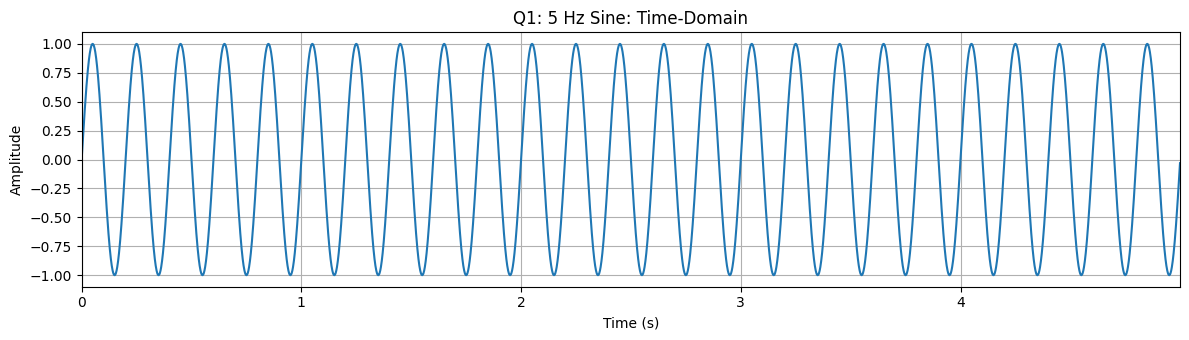

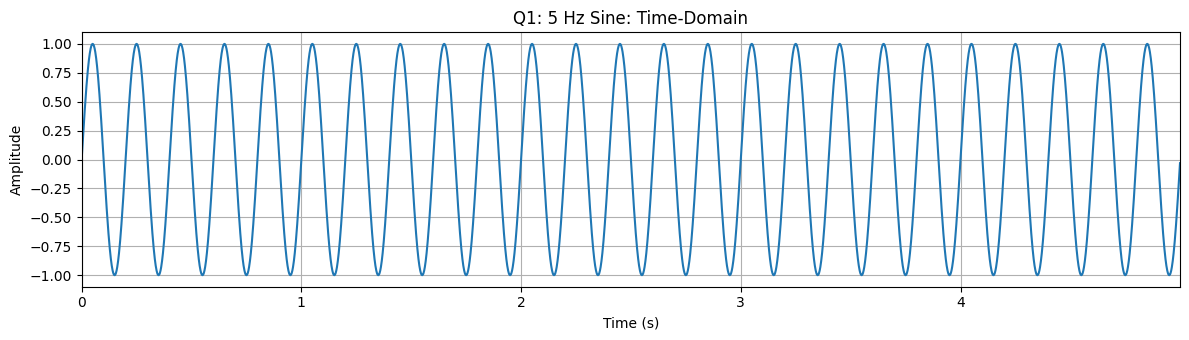

In [3]:
# Q1(a) Generate 5 Hz sinusoid
f0 = 5  # Hz
x1 = np.sin(2 * np.pi * f0 * t)

# Q1(b) Time plot
plot_time(t, x1, "Q1: 5 Hz Sine")


Q1 — DTFT Top Peaks (expected near ±5 Hz):
Peak 1: ~5.005 Hz, magnitude 0.4993
Peak 2: ~4.944 Hz, magnitude 0.4401
Peak 3: ~5.066 Hz, magnitude 0.4126


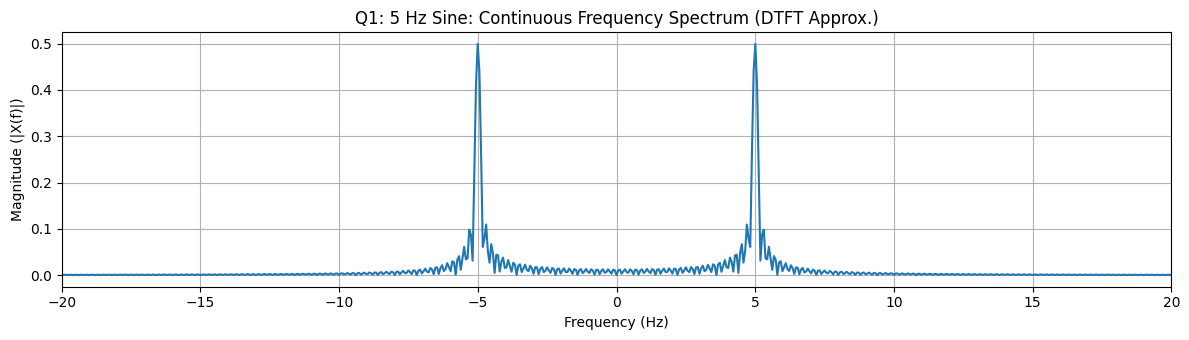

In [4]:
# Q1(c) DTFT
fig_dtft_q1 = plot_dtft(t, x1, SAMPLING_RATE, "Q1: 5 Hz Sine", nfft=N_DTFT, freq_xlim=(-20, 20))

# Show a quick validation of peaks using the high-res DTFT
f_dtft_q1, X_dtft_q1 = compute_dtft(x1, SAMPLING_RATE, nfft=N_DTFT, shift=True)
print("Q1 — DTFT Top Peaks (expected near ±5 Hz):")
_ = print_top_peaks(f_dtft_q1, X_dtft_q1, k=3, min_freq=0)


Q1 — DFT Top Peaks (expected near ±5 Hz):
Peak 1: ~5.000 Hz, magnitude 0.5000
Peak 2: ~381.000 Hz, magnitude 0.0000
Peak 3: ~242.800 Hz, magnitude 0.0000


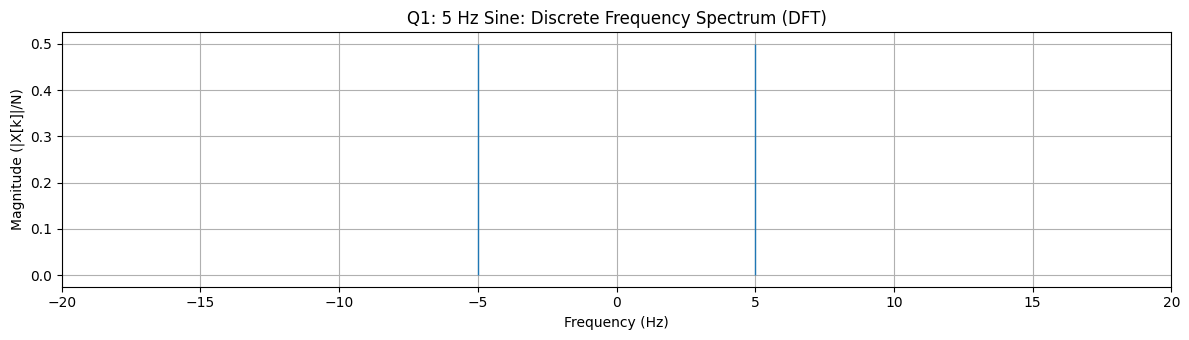

In [5]:
# Q1(d) DFT (no zero-padding; exactly N points)
fig_dft_q1 = plot_dft(t, x1, SAMPLING_RATE, "Q1: 5 Hz Sine", n_dft=len(x1), freq_xlim=(-20, 20))

# Validate using DFT too
f_dft_q1, X_dft_q1 = compute_dft(x1, SAMPLING_RATE, n_dft=len(x1), shift=True, normalize=True)
print("Q1 — DFT Top Peaks (expected near ±5 Hz):")
_ = print_top_peaks(f_dft_q1, X_dft_q1, k=3, min_freq=0)


## Question 2 — Composite Signal (e.g., 15 Hz @ 1.0 + 40 Hz @ 0.6)

Tasks:
- Generate composite signal
- Plot time waveform
- DTFT & DFT and observe distinct peaks at component frequencies


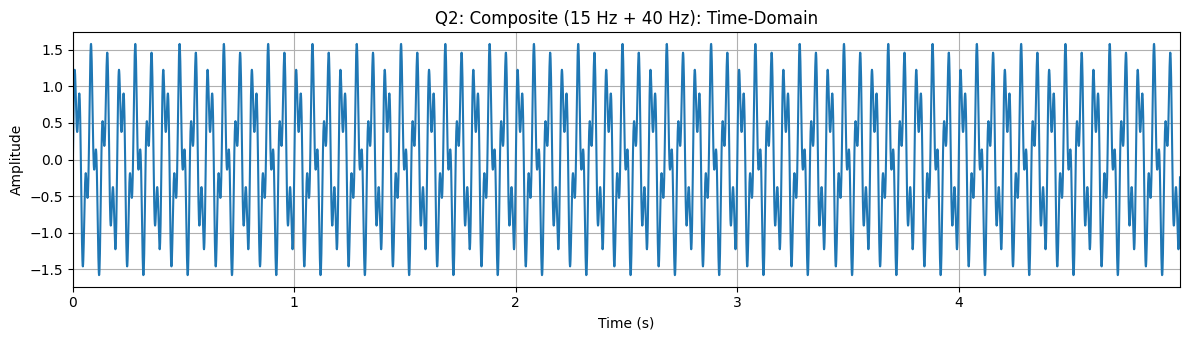

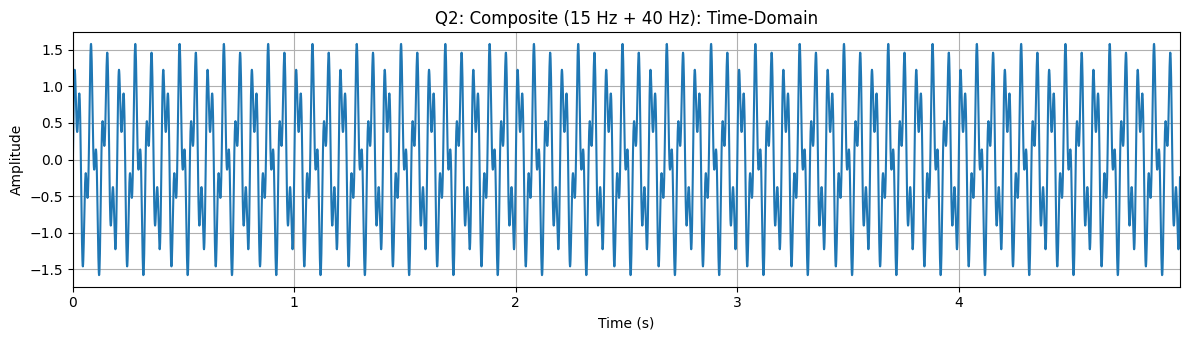

In [6]:
# Q2(a) Composite signal
f1, A1 = 15, 1.0
f2, A2 = 40, 0.6
x2 = A1 * np.sin(2*np.pi*f1*t) + A2 * np.sin(2*np.pi*f2*t)

# Q2(b) Time plot
plot_time(t, x2, "Q2: Composite (15 Hz + 40 Hz)")


Q2 — DTFT Top Peaks (expected near 15 Hz and 40 Hz):
Peak 1: ~15.015 Hz, magnitude 0.4951
Peak 2: ~14.954 Hz, magnitude 0.4584
Peak 3: ~15.076 Hz, magnitude 0.3883
Peak 4: ~14.893 Hz, magnitude 0.2965
Peak 5: ~39.978 Hz, magnitude 0.2939


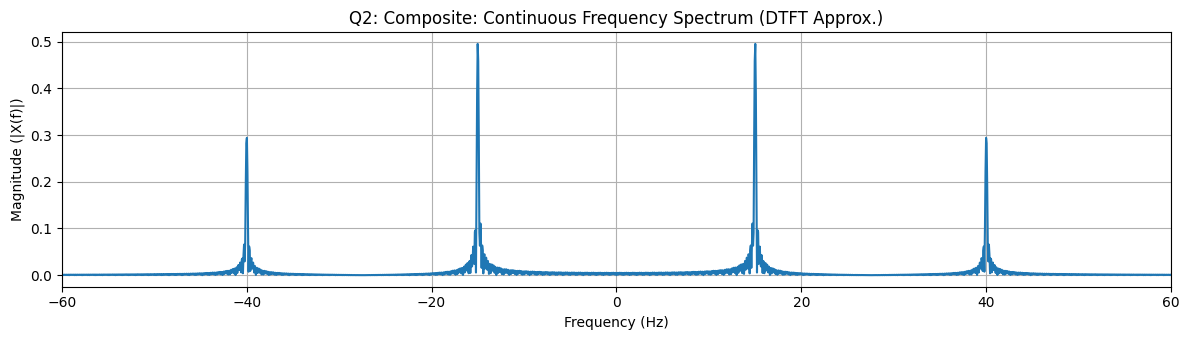

In [7]:
# Q2(c) DTFT
fig_dtft_q2 = plot_dtft(t, x2, SAMPLING_RATE, "Q2: Composite", nfft=N_DTFT, freq_xlim=(-60, 60))

f_dtft_q2, X_dtft_q2 = compute_dtft(x2, SAMPLING_RATE, nfft=N_DTFT, shift=True)
print("Q2 — DTFT Top Peaks (expected near 15 Hz and 40 Hz):")
_ = print_top_peaks(f_dtft_q2, X_dtft_q2, k=5, min_freq=0)


Q2 — DFT Top Peaks (expected near 15 Hz and 40 Hz):
Peak 1: ~15.000 Hz, magnitude 0.5000
Peak 2: ~40.000 Hz, magnitude 0.3000
Peak 3: ~15.200 Hz, magnitude 0.0000
Peak 4: ~14.800 Hz, magnitude 0.0000
Peak 5: ~336.000 Hz, magnitude 0.0000


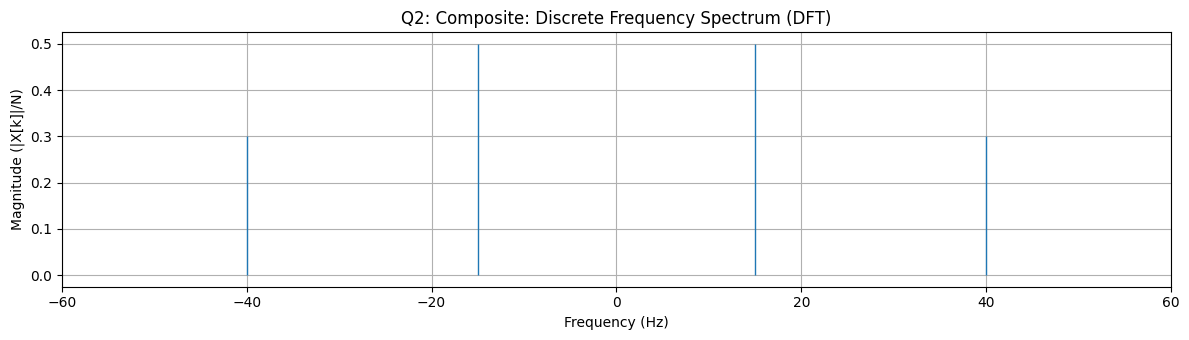

In [8]:
# Q2(d) DFT
fig_dft_q2 = plot_dft(t, x2, SAMPLING_RATE, "Q2: Composite", n_dft=len(x2), freq_xlim=(-60, 60))

f_dft_q2, X_dft_q2 = compute_dft(x2, SAMPLING_RATE, n_dft=len(x2), shift=True, normalize=True)
print("Q2 — DFT Top Peaks (expected near 15 Hz and 40 Hz):")
_ = print_top_peaks(f_dft_q2, X_dft_q2, k=5, min_freq=0)


## Question 3 — Exponentially Decaying Sinusoid

Model: \( x(t) = e^{-\alpha t} \sin(2\pi f t) \)

Tasks:
- Generate signal
- Time plot
- DTFT & DFT
- Analysis: faster decay ⇒ wider spectrum (time–frequency tradeoff)


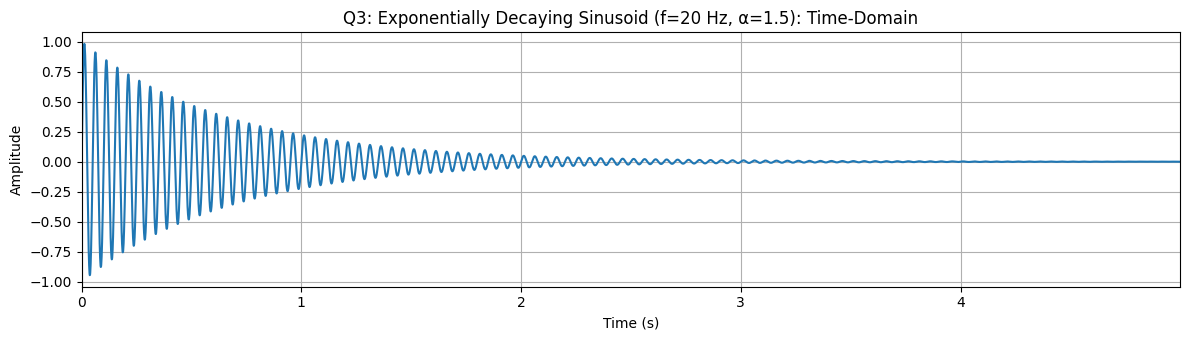

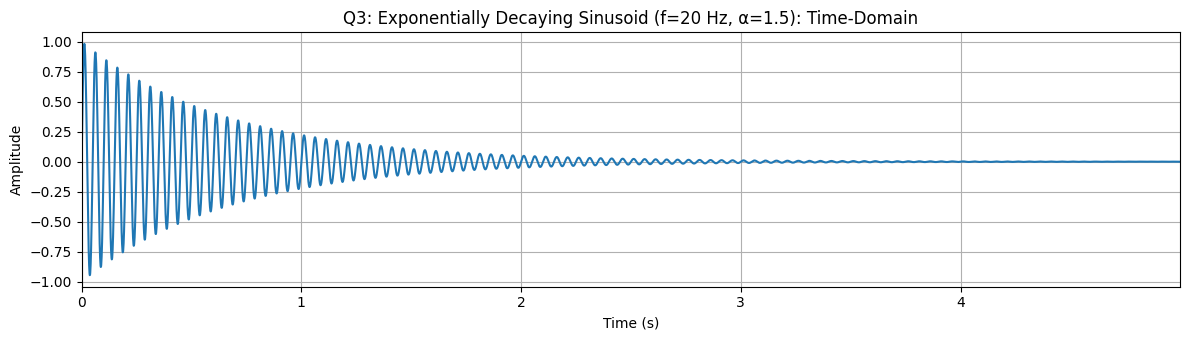

In [9]:
# Q3(a) & (b)
alpha = 1.5   # decay rate
f_exp = 20    # Hz
x3 = np.exp(-alpha * t) * np.sin(2*np.pi*f_exp*t)

plot_time(t, x3, "Q3: Exponentially Decaying Sinusoid (f=20 Hz, α=1.5)")


Q3 — DTFT Top Peaks (expected around ~20 Hz with spectral spread):
Peak 1: ~20.020 Hz, magnitude 0.0664
Peak 2: ~19.958 Hz, magnitude 0.0657
Peak 3: ~20.081 Hz, magnitude 0.0631
Peak 4: ~19.897 Hz, magnitude 0.0614
Peak 5: ~20.142 Hz, magnitude 0.0571
Q3 — DFT Top Peaks:
Peak 1: ~20.000 Hz, magnitude 0.0666
Peak 2: ~19.800 Hz, magnitude 0.0513
Peak 3: ~20.200 Hz, magnitude 0.0508
Peak 4: ~19.600 Hz, magnitude 0.0345
Peak 5: ~20.400 Hz, magnitude 0.0338


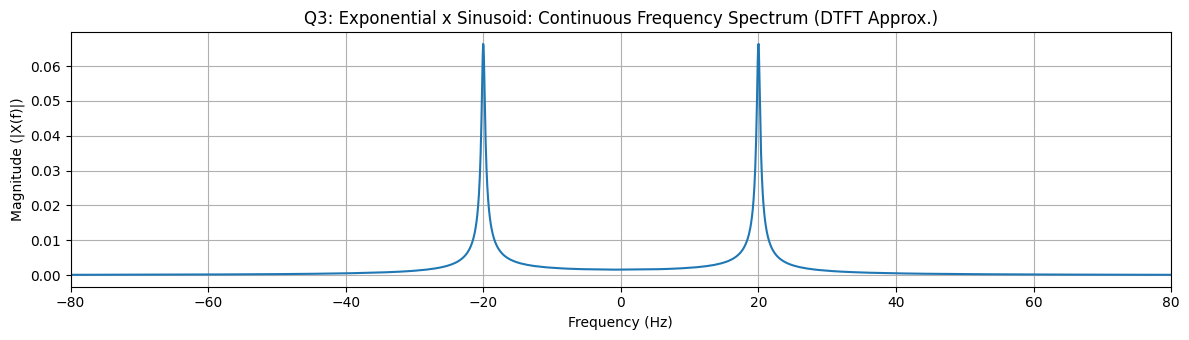

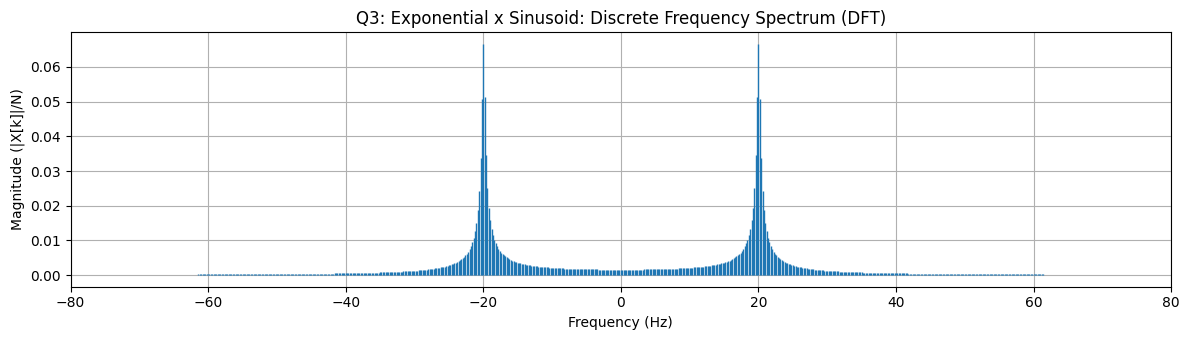

In [10]:
# Q3(c) DTFT
fig_dtft_q3 = plot_dtft(t, x3, SAMPLING_RATE, "Q3: Exponential x Sinusoid", nfft=N_DTFT, freq_xlim=(-80, 80))
f_dtft_q3, X_dtft_q3 = compute_dtft(x3, SAMPLING_RATE, nfft=N_DTFT, shift=True)
print("Q3 — DTFT Top Peaks (expected around ~20 Hz with spectral spread):")
_ = print_top_peaks(f_dtft_q3, X_dtft_q3, k=5, min_freq=0)

# Q3(d) DFT
fig_dft_q3 = plot_dft(t, x3, SAMPLING_RATE, "Q3: Exponential x Sinusoid", n_dft=len(x3), freq_xlim=(-80, 80))
f_dft_q3, X_dft_q3 = compute_dft(x3, SAMPLING_RATE, n_dft=len(x3), shift=True, normalize=True)
print("Q3 — DFT Top Peaks:")
_ = print_top_peaks(f_dft_q3, X_dft_q3, k=5, min_freq=0)


### Q3(e) Inference
- The time-domain envelope decays as \(e^{-\alpha t}\), concentrating the signal in time.
- In frequency domain, this produces **spectral broadening** around ±20 Hz (no sharp delta lines).
- **Faster decay (larger α)** ⇒ more rapid time localization ⇒ **wider** main lobe in frequency (uncertainty principle).


## Question 4 — Rectangular Pulse of Finite Duration

Tasks:
- Generate rectangular pulse
- Time plot
- DTFT & DFT
- Analyze sinc-like spectrum (main lobe + sidelobes). Pulse width ↔ main lobe width (inverse relation).


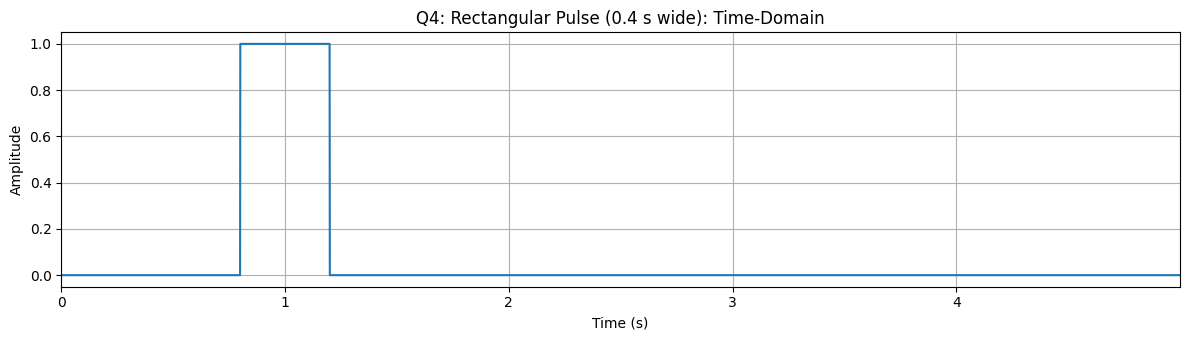

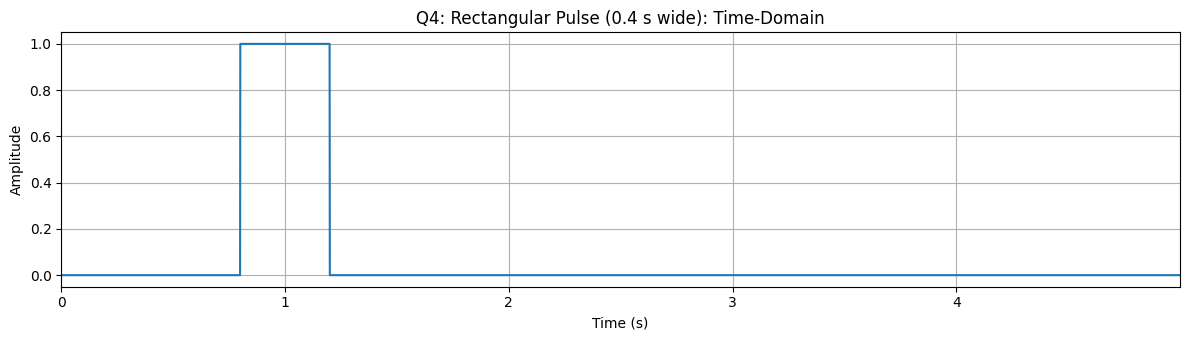

In [11]:
# Q4(a) Generate rectangular pulse of width 0.4 s centered around 1.0 s
x4 = np.zeros(N_SAMPLES)
t0, t1 = 0.8, 1.2
i0, i1 = int(t0 * SAMPLING_RATE), int(t1 * SAMPLING_RATE)
x4[i0:i1] = 1.0

# Q4(b) Time plot
plot_time(t, x4, "Q4: Rectangular Pulse (0.4 s wide)")


Q4 — Expected first spectral zeros near ±1/T = ±2.50 Hz


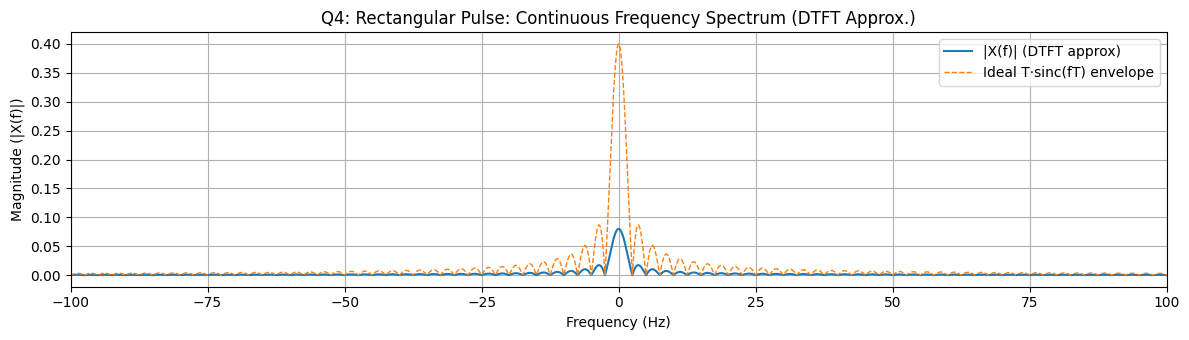

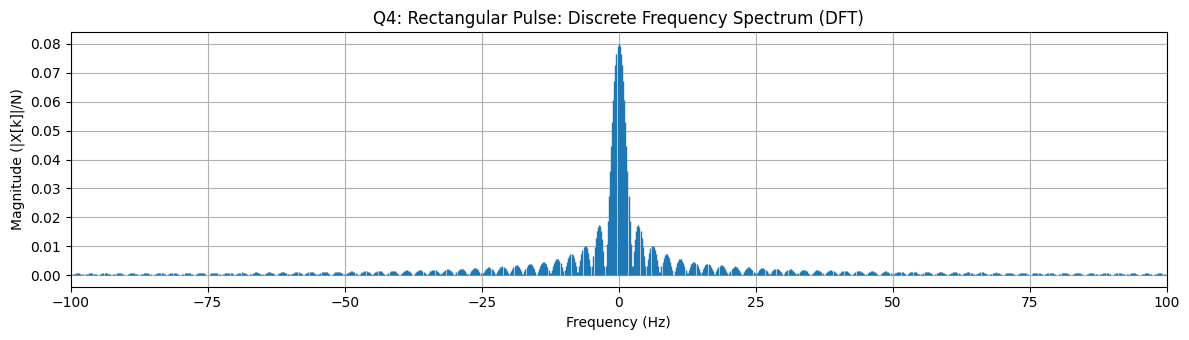

In [12]:
# Q4(c) DTFT
fig_dtft_q4 = plot_dtft(t, x4, SAMPLING_RATE, "Q4: Rectangular Pulse", nfft=N_DTFT, freq_xlim=(-100, 100))
f_dtft_q4, X_dtft_q4 = compute_dtft(x4, SAMPLING_RATE, nfft=N_DTFT, shift=True)

# (Optional) theoretical continuous-time sinc overlay for intuition
# pulse width T = (t1 - t0)
T = t1 - t0
# Ideal |T * sinc(f*T)| shape (using np.sinc normalized as sin(pi x)/(pi x))
sinc_env = np.abs(T * np.sinc(f_dtft_q4 * T))
fig = plt.figure(fig_dtft_q4.number)
ax = fig.axes[0]
ax.plot(f_dtft_q4, sinc_env, linestyle="--", linewidth=1)
ax.legend(["|X(f)| (DTFT approx)", "Ideal T·sinc(fT) envelope"], loc="upper right")
fig.tight_layout()

# Q4(d) DFT
fig_dft_q4 = plot_dft(t, x4, SAMPLING_RATE, "Q4: Rectangular Pulse", n_dft=len(x4), freq_xlim=(-100, 100))

# Quick inspection of main-lobe width ~ 2/T between first zeros at ±1/T
print(f"Q4 — Expected first spectral zeros near ±1/T = ±{1/T:.2f} Hz")


### Q4(e) Inference
- The rectangular pulse has sharp edges in time ⇒ wide spectral content.
- The DTFT shows a **sinc-shaped magnitude** with a broad main lobe and diminishing sidelobes.
- **Pulse width (T)** ↑ ⇒ **narrower** main lobe (zeros near ±1/T). Here, T=0.4 s ⇒ first zeros near ±2.5 Hz.
- DFT shows discrete samples of this continuous spectrum.


## Overall Conclusions
- **Q1:** A pure sinusoid (5 Hz) shows sharp spectral lines at ±5 Hz in DFT/DTFT.
- **Q2:** Composite signals yield distinct peaks at component frequencies with magnitudes proportional to amplitudes.
- **Q3:** Exponential decay in time creates spectral **broadening** around the sinusoid’s frequency (time–frequency tradeoff).
- **Q4:** Finite rectangular pulse exhibits a **sinc** spectrum; increasing pulse width narrows the main lobe and reduces sidelobe spacing.
